# Stacked bar charts

This example shows how stacked bar charts can be used to visualize the number of times each value occurs in a variable (this is known as value counts).

The dataset is a hypothetical questionnaire with five questions and 10,000 True/False responses. Q1: equal number of True and False responses. Q2: one False and the other responses are True. Q3: all the responses are True. Q4/Q5 are the opposite of Q2/Q3.

## Includes: viz_data_quality and other libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from vizdataquality import calculate as vdqc, datasets as vdqd, plot as vdqp

In [2]:
mpl.style.use('tableau-colorblind10')

## Get a dataframe and store the value counts in another dataframe

In [3]:
num_rows, df = vdqd.get_dataset('value counts 2')

vcs = [pd.DataFrame(df[col].value_counts().rename(col)) for col in df.columns]
df_vc = pd.concat(vcs, axis=1, join='outer').fillna(0)

## Visualize the value counts of one variable

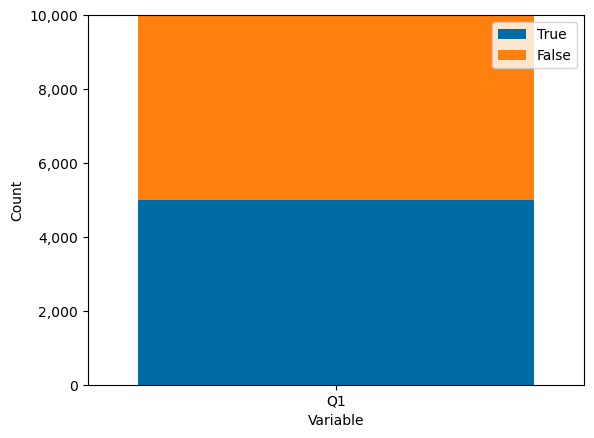

In [4]:
# Set the Y axis limit equal to the number of rows in the data frame
ax_kw = {'ylim': (0, num_rows)}
vdqp.stacked_bar(df_vc[df_vc.columns[0]], ax_kw=ax_kw)

## Visualize the value counts of multiple variables

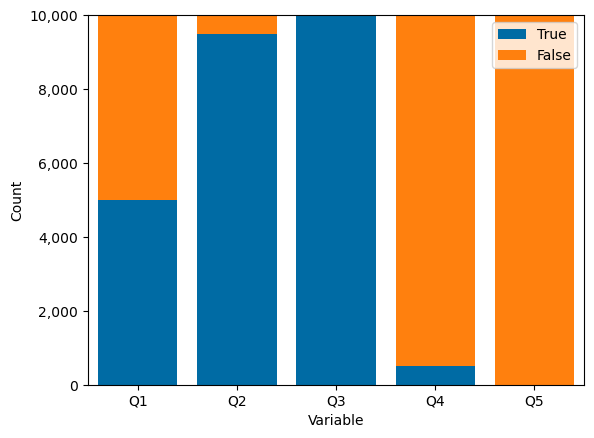

In [5]:
vdqp.stacked_bar(df_vc, ax_kw=ax_kw)

## Customise the visualization

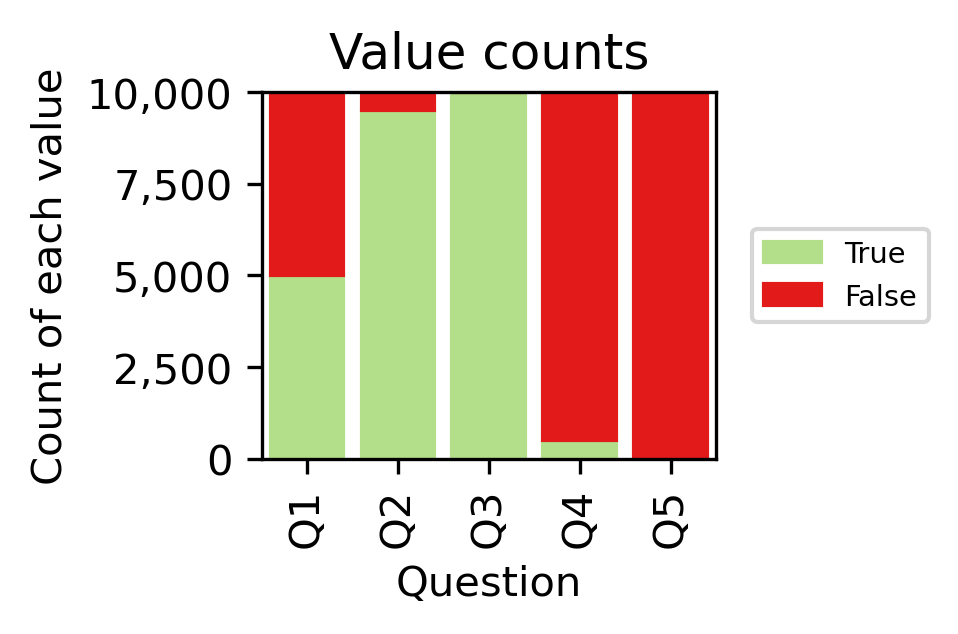

In [6]:
# A dictionary of keyword arguments that are passed to the Matplotlib Figure object
fig_kw = {'size_inches': (3, 2), 'dpi': 300, 'constrained_layout': True}
# A dictionary of keyword arguments that are passed to the Matplotlib Axes object
# ylim has been set equal to the number of records in the dataframe
ax_kw = {'title': 'Value counts', 'xlabel': 'Question', 'ylabel': 'Count of each value', 'ylim': (0, num_rows)}
# Colours for the stack.
clist = [[0.7, 0.87, 0.54], [0.89, 0.1, 0.1]]

legend_kw = {'loc': 'right', 'bbox_to_anchor': (1.5, 0.5), 'fontsize': 'x-small'}
# Rotate the X axis labels, save the plot to a file and apply the keyword arguments.
# NB: If the edge colours are all the same they could be set with the edgecolor keyword argument.
vdqp.stacked_bar(df_vc, xlabels_rotate=90, clist=clist, elist=clist, filename='value counts stacked bar.jpg', fig_kw=fig_kw, ax_kw=ax_kw, legend_kw=legend_kw)

## Horizontal rather than vertical plot

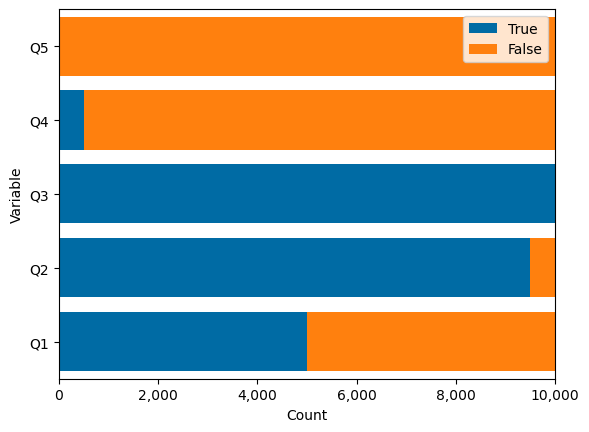

In [7]:
# Set the Y axis limit equal to the number of rows in the data frame
ax_kw = {'xlim': (0, num_rows)}
vdqp.stacked_bar(df_vc, vert=False, ax_kw=ax_kw)

## The values can be divided into multiple plots (useful if there are many unique values)

### Multiple rows of plots

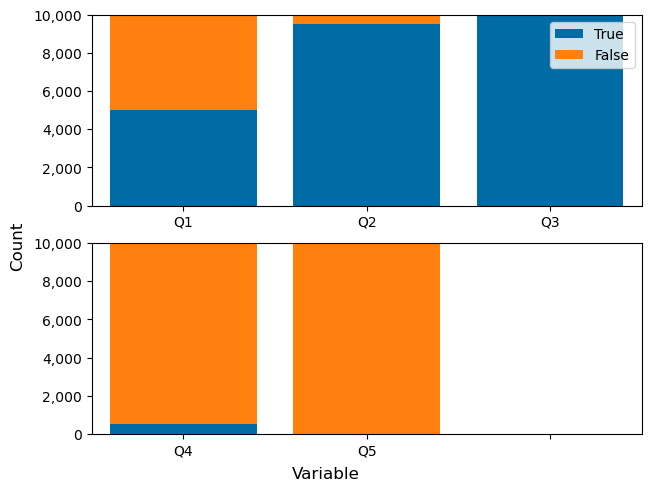

In [8]:
fig_kw = {'constrained_layout': True}
ax_kw = {'ylim': (0, num_rows)}
vdqp.multiplot('stackedbar', df_vc, number_of_variables_per_row=3, fig_kw=fig_kw, ax_kw=ax_kw)

### Multiple columns of plots

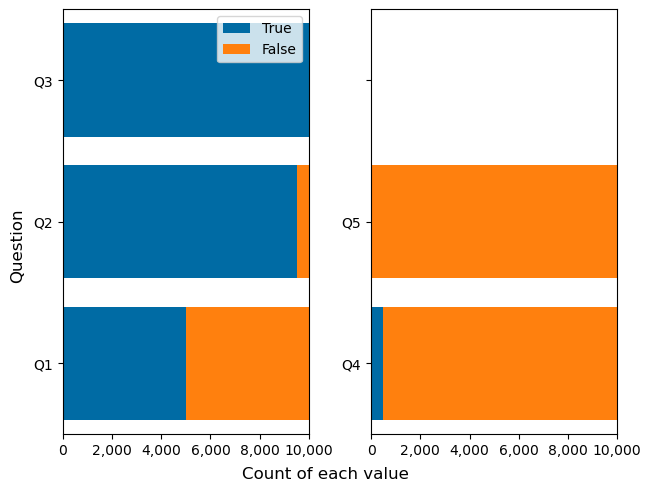

In [9]:
fig_kw = {'constrained_layout': True}
# Customise the axis labels
ax_kw = {'xlabel': 'Count of each value', 'xlim': (0, num_rows), 'ylabel': 'Question'}
vdqp.multiplot('stackedbar', df_vc, number_of_variables_per_row=3, vert=False, fig_kw=fig_kw, ax_kw=ax_kw)

## Perceptual discontinuity

If a normal stacked bar chart is used then the bars for Q2 and Q4 are misleading, because they only have one False (Q2) and True (Q4) value and the bar chart does not have sufficient resolution to show that (the bar would only be a small fraction of a pixel high in this notebook or if saved as an image).

The perceptual discontinuity version of the bar chart adjusts the length of the bars for variables Q2 and Q4 so every unique value is easy to see.

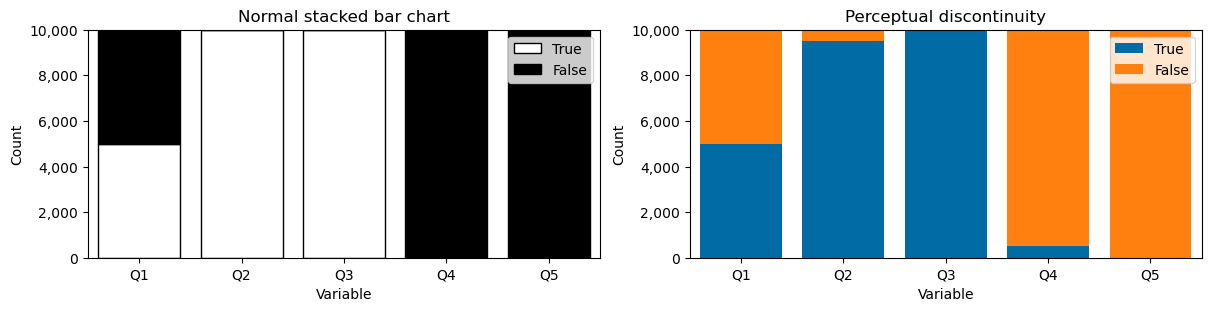

In [10]:
fig, axs = plt.subplots(1, 2)
fig_kw = {'size_inches': (12, 3), 'constrained_layout': True}
fig.set(**fig_kw)

# Colours for the stack.
clist = [[1, 1, 1], [0, 0, 0]]
elist = [[0, 0, 0], [0, 0, 0]]
ax_kw = {'title': 'Normal stacked bar chart', 'ylim': (0, num_rows)}
vdqp.stacked_bar(df_vc, perceptual_threshold=None, ax_input=axs[0], clist=clist, elist=elist, ax_kw=ax_kw)

ax_kw = {'title': 'Perceptual discontinuity', 'ylim': (0, num_rows)}
vdqp.stacked_bar(df_vc, ax_input=axs[1], ax_kw=ax_kw)